Initial Exploration of Age and Gender Features
==============================================

This notebook serves as an initial exploration of machine learning techniques against the Titanic dataset. To keep things very simple, we focus on two features of the data: age and sex of passenger. Given that the sex / gender is already created as an example submission, we can use that to confirm validation methodologies.

In [1]:
# set up code and dataframe with training data
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, preprocessing
from sklearn.model_selection import train_test_split, \
                                    cross_val_score, \
                                    KFold

df = pd.read_csv("../data/kaggle/train.csv")
print(df.shape)

(891, 12)


In [2]:
# set up the X, y values for the train and test sets
x1_col_name, x2_col_name, y_col_name = 'Sex', 'Age', 'Survived'

# for the first exploration, we want to focus on gender, so we set the variable to X1
X1_ = df[[ x1_col_name ]]
y = df[ y_col_name ].values

# because the sex / gender data is categorical ['male', 'female'], then we need
# to convert it to ordinal numbers; this could also be done with an apply function,
# I'm choosing to use the preprocessing encoder here as a learning opportunity
enc = preprocessing.OrdinalEncoder()
X = enc.fit_transform(X1_)

In [3]:
X_train, X_test, y_train, y_test = train_test_split( X, y, \
                                     test_size=0.2, random_state=1)

clf = svm.SVC( kernel='linear', C=1 ).fit( X_train, y_train )
clf.score(X_test, y_test)

0.776536312849162

In [4]:
# transform the dataframe, so that it can be properly graphed as a bar plot
df_group_count = df.groupby([x1_col_name, y_col_name])[x1_col_name].count()
print(df_group_count)
print()
df_grouped = df_group_count.unstack(y_col_name)
print(df_grouped)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

Survived    0    1
Sex               
female     81  233
male      468  109


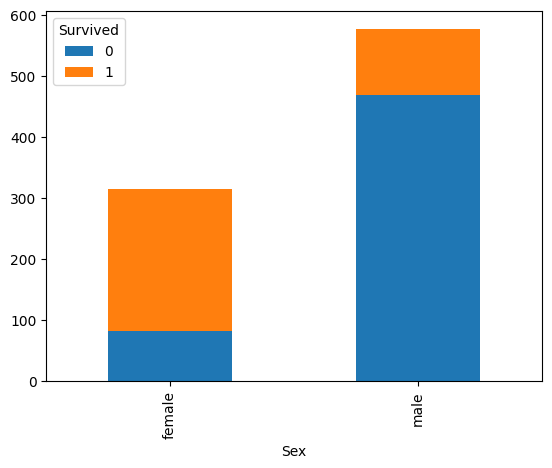

In [5]:
df_grouped.plot(kind='bar', stacked=True)
plt.show()

In [6]:
age_val_count = df[[x2_col_name]].count()
age_nan_count = df[[x2_col_name]].isna().sum()
print(f"Value count: {age_val_count.values[0]}")
print(f"NAN count:   {age_nan_count.values[0]}")

Value count: 714
NAN count:   177


In [7]:
df_age_only_vals = df.dropna(subset=x2_col_name)
df_age_subset = (df_age_only_vals[[y_col_name, x2_col_name]])

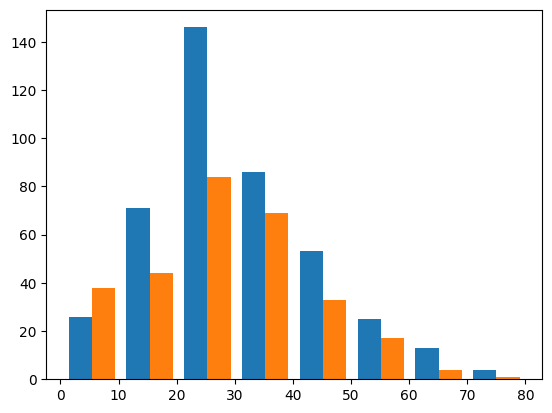

In [8]:
df_age_survived = df_age_subset[ df_age_subset[ y_col_name ] == 0 ].pivot(columns='Survived', values='Age')
df_age_notsurvived = df_age_subset[ df_age_subset[ y_col_name ] == 1 ].pivot(columns='Survived', values='Age')

counts, bins, patches = plt.hist([df_age_survived[0], df_age_notsurvived[1]], bins=8)
plt.show()